

# Project: TMDP analysis (getting to know box office better)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Questions to answer using the analysis process 

## Q1: what is the best 10 movies ?

## Q2: what is the production companies that have the highest revenue ?

## Q3: what is the most popular production company overtime?

## Q4: shortest and longest movie?

## Q5:what is the most popular movie ?

## Q6:which generes are most popular ?

## Q7:what is the properities that are associated with movies that have high revenue ?

In [1]:
#importing libraries
import pandas as pd
import numpy as np 
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

<a id='wrangling'></a>
# Data Wrangling



### Geting to know general properties

In [2]:
# loading data and taking a look at it
data = pd.read_csv('tmdb_5000_movies.csv')
data.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
data.shape

(4803, 20)

In [4]:
# to know the data better 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
# removing NAN values in runtime col to change it's dtype
data.dropna(subset = ["runtime"], inplace=True)

In [6]:
# changing data types of some columns to be more accurate
data['release_date'] = pd.to_datetime(data['release_date'])
data['id'] = data["id"].astype(str)
data['runtime'] = data["runtime"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4801 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4801 non-null   int64         
 1   genres                4801 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4801 non-null   object        
 4   keywords              4801 non-null   object        
 5   original_language     4801 non-null   object        
 6   original_title        4801 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4801 non-null   float64       
 9   production_companies  4801 non-null   object        
 10  production_countries  4801 non-null   object        
 11  release_date          4800 non-null   datetime64[ns]
 12  revenue               4801 non-null   int64         
 13  runtime           

In [7]:
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.801000e+03,4801.000000,4.801000e+03,4801.000000,4801.000000,4801.000000
mean,2.905402e+07,21.501089,8.229491e+07,106.875859,6.093189,690.503020
std,4.072821e+07,31.820361,1.628824e+08,22.611935,1.191493,1234.764044
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,4.680206,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.928269,1.917997e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,28.350529,9.292120e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
# to know if it is an important column
data['status'].value_counts()

Released           4793
Rumored               5
Post Production       3
Name: status, dtype: int64

In [9]:
# to know if there is too many missing values 
data['revenue'].value_counts()

0           1425
7000000        6
8000000        6
6000000        5
12000000       5
            ... 
32726956       1
4420000        1
26096852       1
79817939       1
10680275       1
Name: revenue, Length: 3297, dtype: int64

In [10]:
# dropping unnecessary columns 
data = data.drop(['homepage', 'id', 'keywords', 'original_title', 'overview', 'spoken_languages', 'tagline', 'status'], axis=1)
data.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,John Carter,6.1,2124


In [11]:
#function iterates over the list and return the first name in the first dictionary 
def name(col):
        names = [i['name'] for i in col]
        names = names[:1]
        return names
    
#function converts the list into a string 
def to_String(st):  
    string = " "  
    return (string.join(st))
    
#applying the functions:

data['genres'] =data['genres'].apply(literal_eval)
data['production_companies'] = data['production_companies'].apply(literal_eval)
data['production_countries']=data['production_countries'].apply(literal_eval)
#note:literal_eval is a function make the list readable 

data['genres'] = data['genres'].apply(name)
data['production_companies'] = data['production_companies'].apply(name)
data['production_countries']=data['production_countries'].apply(name)


data['genres'] = data['genres'].apply(to_String)
data['production_companies'] =data['production_companies'].apply(to_String)
data['production_countries']=data['production_countries'].apply(to_String)

In [12]:
data.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,Action,en,150.437577,Ingenious Film Partners,United States of America,2009-12-10,2787965087,162,Avatar,7.2,11800
1,300000000,Adventure,en,139.082615,Walt Disney Pictures,United States of America,2007-05-19,961000000,169,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,en,107.376788,Columbia Pictures,United Kingdom,2015-10-26,880674609,148,Spectre,6.3,4466
3,250000000,Action,en,112.312950,Legendary Pictures,United States of America,2012-07-16,1084939099,165,The Dark Knight Rises,7.6,9106
4,260000000,Action,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132,John Carter,6.1,2124


In [13]:
# sorting data according to vote average desc
data = data.sort_values(by=['vote_average'],ascending=False)
data.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
4247,1,Romance,en,0.094105,,,2015-07-07,0,90,Me You and Five Bucks,10.0,2
4662,0,Comedy,en,0.092100,Fly High Films,United States of America,2006-01-01,0,0,Little Big Top,10.0,1
4045,0,Comedy,en,0.376662,HSX Films,United States of America,1998-05-01,565592,97,"Dancer, Texas Pop. 81",10.0,1
3519,0,Comedy,en,0.356495,,United Kingdom,1998-06-12,0,99,Stiff Upper Lips,10.0,1
3992,0,,en,0.296981,,India,2015-06-26,0,0,Sardaarji,9.5,2


In [14]:
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,4.801000e+03,4801.000000,4.801000e+03,4801.000000,4801.000000,4801.000000
mean,2.905402e+07,21.501089,8.229491e+07,106.875859,6.093189,690.503020
std,4.072821e+07,31.820361,1.628824e+08,22.611935,1.191493,1234.764044
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,4.680206,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,12.928269,1.917997e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,28.350529,9.292120e+07,118.000000,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [15]:
#dealing with the outliers by assigned vote count > 100 to be unbiased , revenue & runtime > 1 to be realistic and budget > 1000 to be realistic
data=data[(data['vote_count']> 100) & (data['revenue']> 1)&(data['runtime']> 1) & (data['budget']> 1000)]
data.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
1881,25000000,Drama,en,136.747729,Castle Rock Entertainment,United States of America,1994-09-23,28341469,142,The Shawshank Redemption,8.5,8205
3337,6000000,Drama,en,143.659698,Paramount Pictures,United States of America,1972-03-14,245066411,175,The Godfather,8.4,5893
2294,15000000,Fantasy,ja,118.968562,Studio Ghibli,Japan,2001-07-20,274925095,125,Spirited Away,8.3,3840
2731,13000000,Drama,en,105.792936,Paramount Pictures,United States of America,1974-12-20,47542841,200,The Godfather: Part II,8.3,3338
1818,22000000,Drama,en,104.469351,Universal Pictures,United States of America,1993-11-29,321365567,195,Schindler's List,8.3,4329


In [16]:
data.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count
count,2.704000e+03,2704.000000,2.704000e+03,2704.000000,2704.000000,2704.000000
mean,4.576685e+07,33.799691,1.423487e+08,111.156805,6.376701,1157.162352
std,4.631771e+07,37.690913,1.966174e+08,20.197558,0.827539,1479.628885
min,7.000000e+03,1.041254,1.200000e+01,63.000000,3.000000,101.000000
25%,1.400000e+07,15.000241,3.001212e+07,97.000000,5.800000,298.000000
50%,3.000000e+07,24.928480,7.587642e+07,107.000000,6.400000,612.500000
75%,6.000000e+07,41.506616,1.701635e+08,122.000000,7.000000,1373.250000
max,3.800000e+08,875.581305,2.787965e+09,248.000000,8.500000,13752.000000


In [17]:
data.shape

(2704, 12)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2704 entries, 1881 to 2194
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                2704 non-null   int64         
 1   genres                2704 non-null   object        
 2   original_language     2704 non-null   object        
 3   popularity            2704 non-null   float64       
 4   production_companies  2704 non-null   object        
 5   production_countries  2704 non-null   object        
 6   release_date          2704 non-null   datetime64[ns]
 7   revenue               2704 non-null   int64         
 8   runtime               2704 non-null   int32         
 9   title                 2704 non-null   object        
 10  vote_average          2704 non-null   float64       
 11  vote_count            2704 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(5)
memory us

<a id='eda'></a>
## Exploratory Data Analysis

## Q1 : what is the best 10 movies ?

In [19]:
data.head(10)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
1881,25000000,Drama,en,136.747729,Castle Rock Entertainment,United States of America,1994-09-23,28341469,142,The Shawshank Redemption,8.5,8205
3337,6000000,Drama,en,143.659698,Paramount Pictures,United States of America,1972-03-14,245066411,175,The Godfather,8.4,5893
2294,15000000,Fantasy,ja,118.968562,Studio Ghibli,Japan,2001-07-20,274925095,125,Spirited Away,8.3,3840
2731,13000000,Drama,en,105.792936,Paramount Pictures,United States of America,1974-12-20,47542841,200,The Godfather: Part II,8.3,3338
1818,22000000,Drama,en,104.469351,Universal Pictures,United States of America,1993-11-29,321365567,195,Schindler's List,8.3,4329
3865,3300000,Drama,en,192.528841,Bold Films,United States of America,2014-10-10,13092000,105,Whiplash,8.3,4254
3232,8000000,Thriller,en,121.463076,Miramax Films,United States of America,1994-10-08,213928762,154,Pulp Fiction,8.3,8428
662,63000000,Drama,en,146.757391,Regency Enterprises,Germany,1999-10-15,100853753,139,Fight Club,8.3,9413
65,185000000,Drama,en,187.322927,DC Comics,United Kingdom,2008-07-16,1004558444,152,The Dark Knight,8.2,12002
3057,20000000,Drama,en,73.567232,New Line Cinema,United States of America,1998-10-30,23875127,119,American History X,8.2,3016


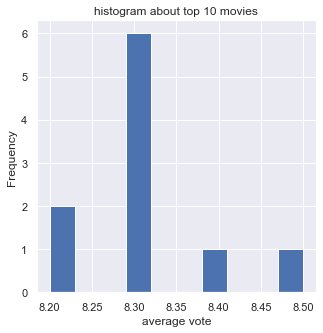

In [20]:
top10 = data.head(10)
sns.set(rc={'figure.figsize':(5,5)})
top10['vote_average'].hist()
plt.xlabel('average vote')
plt.ylabel('Frequency')
plt.title("histogram about top 10 movies")
plt.show()

### so i figuered out that the top 10 movies is   {The Shawshank Redemption, The Godfather, Spirited Away, The Godfather: Part II, Schindler's List, Whiplash, Pulp Fiction, Fight Club, The Dark Knight, American History X	}

## Q2: what is the production companies that have the highest revenue ?

In [21]:
production_revenue = data[['production_companies', 'revenue']].groupby(['production_companies']).sum().sort_values(by=['revenue'],ascending=False).head(10)
production_revenue
# the highest companies in the revenue is this list

,revenue
production_companies,
Paramount Pictures,38046840024
Universal Pictures,34262607145
Walt Disney Pictures,28455957530
Columbia Pictures,27759110658
Twentieth Century Fox Film Corporation,22623851355
New Line Cinema,13278596547
Village Roadshow Pictures,11813945421
DreamWorks SKG,10519400546
Warner Bros.,7486067123


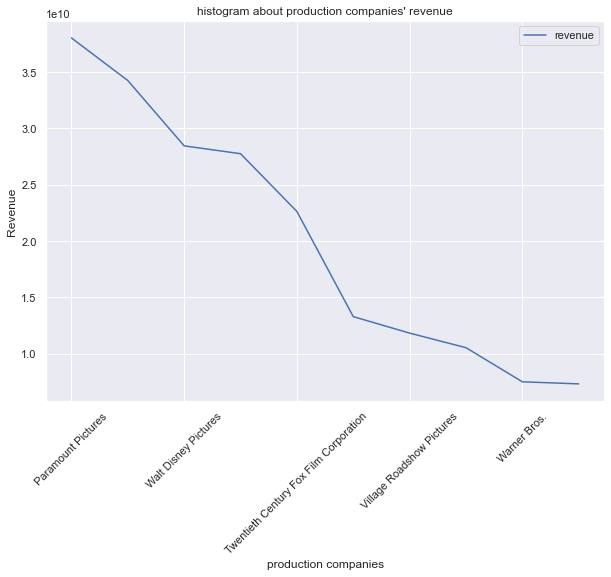

In [22]:
sns.set(rc={'figure.figsize':(10,7)})
ax = production_revenue.plot()
plt.xlabel('production companies')
plt.ylabel('Revenue')
plt.title("histogram about production companies' revenue")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

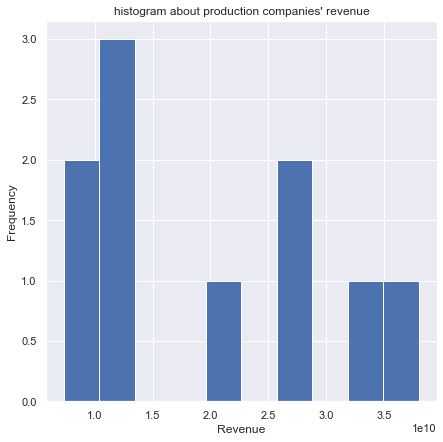

In [23]:
sns.set(rc={'figure.figsize':(7,7)})
plt.hist(x=production_revenue)
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title("histogram about production companies' revenue")
plt.show()

### SO, the production companies that have the highest revenue are {Paramount Pictures, Universal Pictures, Walt Disney Pictures, 	Columbia Pictures,	Twentieth Century Fox Film Corporation,	New Line Cinema, Village Roadshow Pictures,	DreamWorks SKG,	Warner Bros.,	Marvel Studios	}

## Q3: what is the most popular production company overtime

In [24]:
production_pop = data[['production_companies', 'popularity', 'release_date']].groupby(['production_companies']).sum().sort_values(by=['popularity'],ascending=False).head(5)
production_pop

,popularity
production_companies,
Universal Pictures,7821.034909
Paramount Pictures,7811.510027
Columbia Pictures,5790.840584
Twentieth Century Fox Film Corporation,5221.065058
Walt Disney Pictures,4686.469791


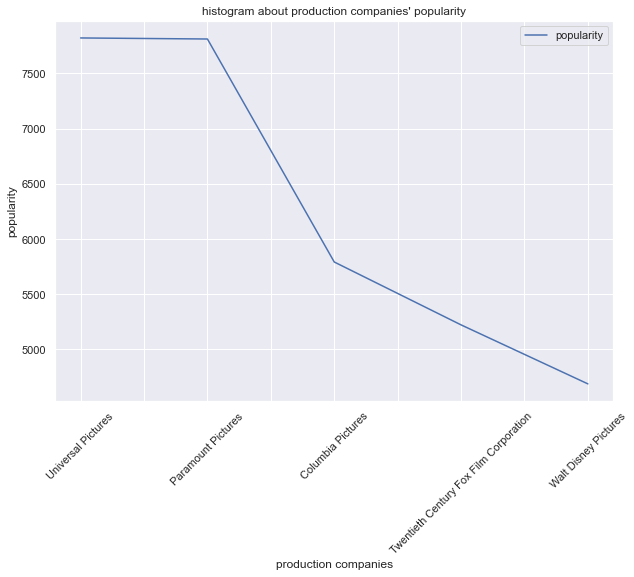

In [25]:
sns.set(rc={'figure.figsize':(10,7)})
ax = production_pop.plot()
plt.xlabel('production companies')
plt.ylabel('popularity')
plt.title("histogram about production companies' popularity")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

### SO, the most popular production company overtime are {Universal Pictures, Paramount Pictures,  Columbia Pictures, Twentieth Century Fox Film Corporation,  Walt Disney Pictures}

## Q4 : shortest and longest movie

In [26]:
#the longest movie
data.sort_values(by=['runtime'],ascending=False).head(1)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
1125,31115000,Drama,en,13.244365,Twentieth Century Fox Film Corporation,United Kingdom,1963-06-12,71000000,248,Cleopatra,6.7,146


In [27]:
#the shortest movie
data.sort_values(by=['runtime'],ascending=True).head(1)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
1620,30000000,Animation,en,19.143721,Walt Disney Pictures,United States of America,2011-04-13,14460000,63,Winnie the Pooh,6.8,258


### SO, the shortest movie[ is Winnie the Pooh ]and the longest one is [ Cleopatra ]

## Q5: what is the most popular movies ?

In [28]:
pop_movies = data[['title', 'popularity']].groupby(['title']).sum().sort_values(by=['popularity'],ascending=False).head(5)
pop_movies

,popularity
title,
Minions,875.581305
Interstellar,724.247784
Deadpool,514.569956
Guardians of the Galaxy,481.098624
Mad Max: Fury Road,434.278564


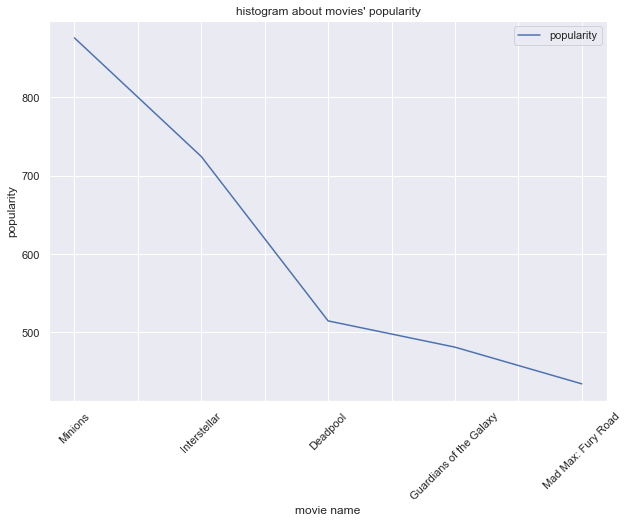

In [29]:
sns.set(rc={'figure.figsize':(10,7)})
ax = pop_movies.plot()
plt.xlabel('movie name')
plt.ylabel('popularity')
plt.title("histogram about movies' popularity")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

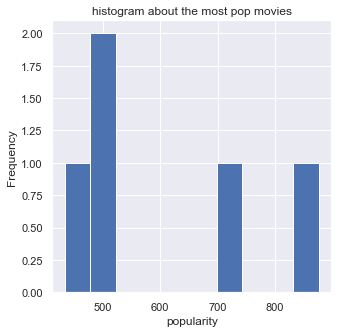

In [30]:
sns.set(rc={'figure.figsize':(5,5)})
pop_movies['popularity'].hist()
plt.xlabel('popularity')
plt.ylabel('Frequency')
plt.title("histogram about the most pop movies")
plt.show()

### SO, the most popular movies are {Minions,	Interstellar,	Deadpool,	Guardians of the Galaxy,	Mad Max: Fury Road	}

## Q6: which genres are most popular  ?

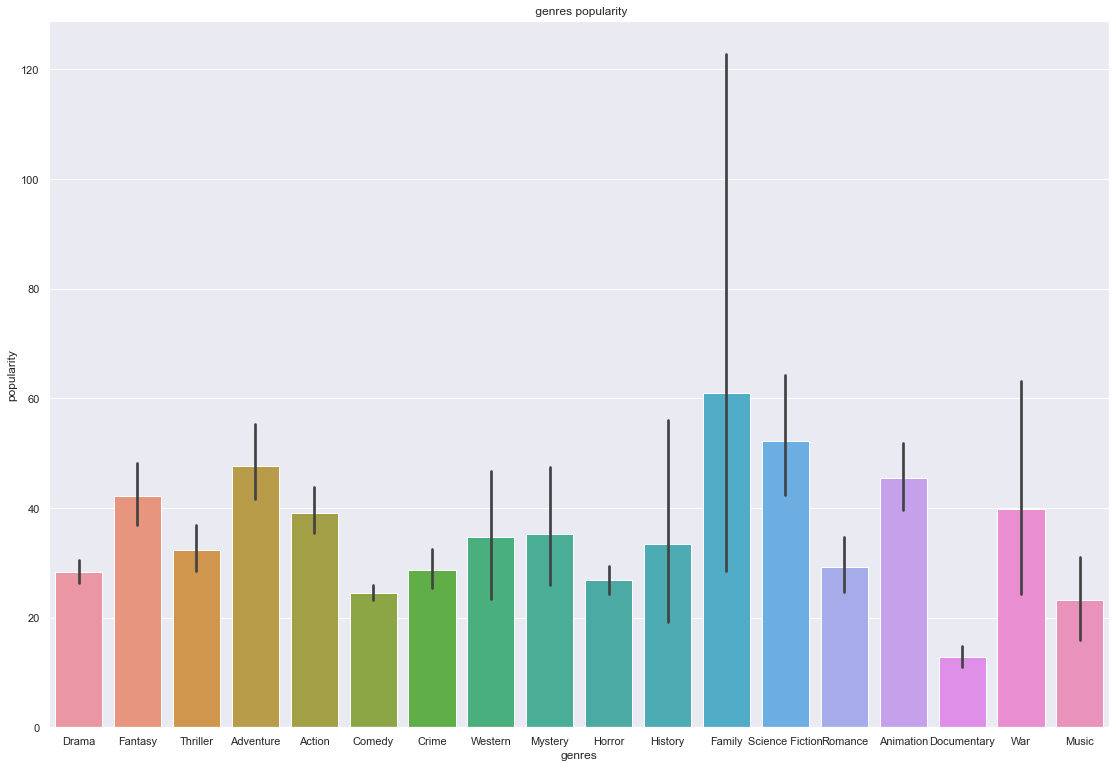

In [31]:
sns.set(rc={'figure.figsize':(19,13)})
sns.barplot(data=data, x="genres", y="popularity")
plt.title(" genres popularity")
plt.show()

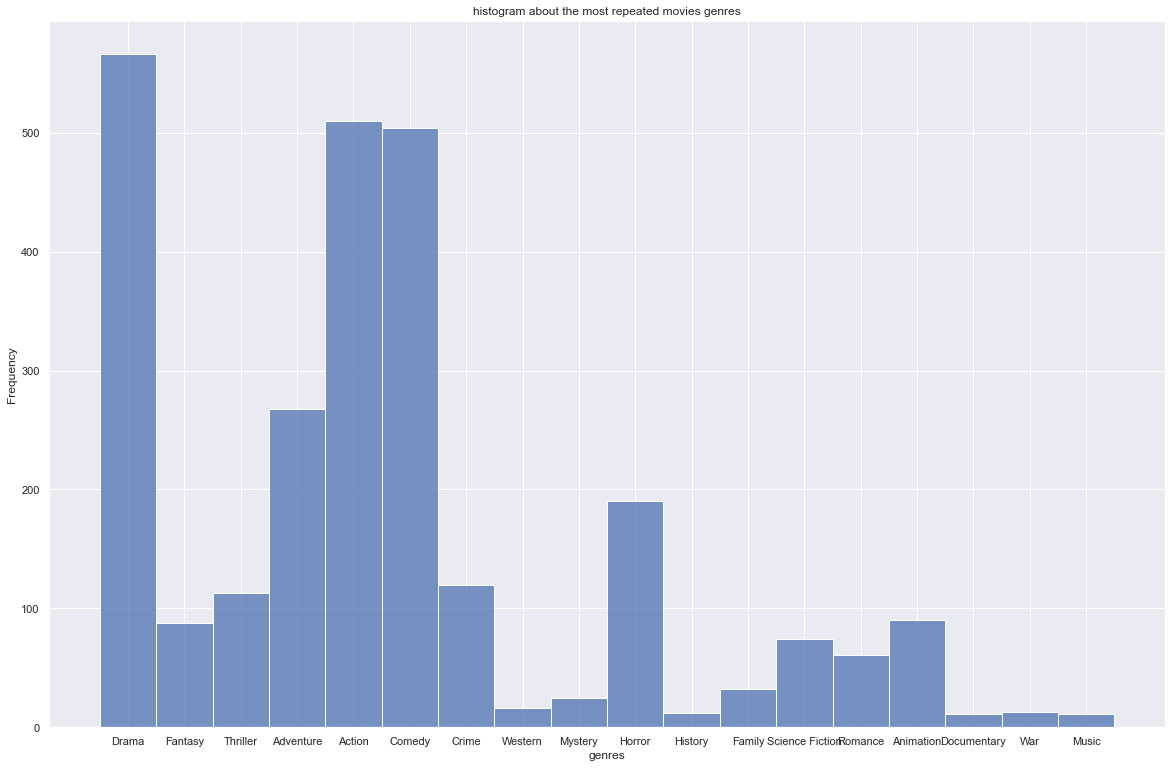

In [32]:
sns.set(rc={'figure.figsize':(20,13)})
sns.histplot(data=data, x="genres")
plt.ylabel('Frequency')
plt.title("histogram about the most repeated movies genres")
plt.show()

### SO, the most repeated genres are [ drama , action, comedy ] and most popular genres are [ family, science fiction, adventure ]

## Q7: what is the properities that are associated with movies that have high revenue ?

In [33]:
#plotting corr matrix
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.387724,0.690507,0.251749,-0.073872,0.508283
popularity,0.387724,1.000000,0.570175,0.199891,0.282508,0.725594
revenue,0.690507,0.570175,1.000000,0.257140,0.170413,0.737574
runtime,0.251749,0.199891,0.257140,1.000000,0.411012,0.289410
vote_average,-0.073872,0.282508,0.170413,0.411012,1.000000,0.393132
vote_count,0.508283,0.725594,0.737574,0.289410,0.393132,1.000000


### so the most properities associated with high revenue is budget and vote_count

# ----------------------------------------------------------------------------------------------------------------

In [34]:
# to know the most frequent genres,original_language and production_countries in top 20 movies 
data.head(20)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
1881,25000000,Drama,en,136.747729,Castle Rock Entertainment,United States of America,1994-09-23,28341469,142,The Shawshank Redemption,8.5,8205
3337,6000000,Drama,en,143.659698,Paramount Pictures,United States of America,1972-03-14,245066411,175,The Godfather,8.4,5893
2294,15000000,Fantasy,ja,118.968562,Studio Ghibli,Japan,2001-07-20,274925095,125,Spirited Away,8.3,3840
2731,13000000,Drama,en,105.792936,Paramount Pictures,United States of America,1974-12-20,47542841,200,The Godfather: Part II,8.3,3338
1818,22000000,Drama,en,104.469351,Universal Pictures,United States of America,1993-11-29,321365567,195,Schindler's List,8.3,4329
3865,3300000,Drama,en,192.528841,Bold Films,United States of America,2014-10-10,13092000,105,Whiplash,8.3,4254
3232,8000000,Thriller,en,121.463076,Miramax Films,United States of America,1994-10-08,213928762,154,Pulp Fiction,8.3,8428
662,63000000,Drama,en,146.757391,Regency Enterprises,Germany,1999-10-15,100853753,139,Fight Club,8.3,9413
65,185000000,Drama,en,187.322927,DC Comics,United Kingdom,2008-07-16,1004558444,152,The Dark Knight,8.2,12002
3057,20000000,Drama,en,73.567232,New Line Cinema,United States of America,1998-10-30,23875127,119,American History X,8.2,3016


In [35]:
# to know the highest movie in the revenue
data.sort_values(by=['revenue'],ascending=False).head(5)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,Action,en,150.437577,Ingenious Film Partners,United States of America,2009-12-10,2787965087,162,Avatar,7.2,11800
25,200000000,Drama,en,100.025899,Paramount Pictures,United States of America,1997-11-18,1845034188,194,Titanic,7.5,7562
16,220000000,Science Fiction,en,144.448633,Paramount Pictures,United States of America,2012-04-25,1519557910,143,The Avengers,7.4,11776
28,150000000,Action,en,418.708552,Universal Studios,United States of America,2015-06-09,1513528810,124,Jurassic World,6.5,8662
44,190000000,Action,en,102.322217,Universal Pictures,Japan,2015-04-01,1506249360,137,Furious 7,7.3,4176


In [36]:
# to the most movies got voted 
data.sort_values(by=['vote_count'],ascending=False).head(5)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
96,160000000,Action,en,167.583710,Legendary Pictures,United Kingdom,2010-07-14,825532764,148,Inception,8.1,13752
65,185000000,Drama,en,187.322927,DC Comics,United Kingdom,2008-07-16,1004558444,152,The Dark Knight,8.2,12002
0,237000000,Action,en,150.437577,Ingenious Film Partners,United States of America,2009-12-10,2787965087,162,Avatar,7.2,11800
16,220000000,Science Fiction,en,144.448633,Paramount Pictures,United States of America,2012-04-25,1519557910,143,The Avengers,7.4,11776
788,58000000,Action,en,514.569956,Twentieth Century Fox Film Corporation,United States of America,2016-02-09,783112979,108,Deadpool,7.4,10995


In [37]:
# to know the highest budget in the movies 
data.sort_values(by=['budget'],ascending=False).head(5)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
17,380000000,Adventure,en,135.413856,Walt Disney Pictures,United States of America,2011-05-14,1045713802,136,Pirates of the Caribbean: On Stranger Tides,6.4,4948
1,300000000,Adventure,en,139.082615,Walt Disney Pictures,United States of America,2007-05-19,961000000,169,Pirates of the Caribbean: At World's End,6.9,4500
7,280000000,Action,en,134.279229,Marvel Studios,United States of America,2015-04-22,1405403694,141,Avengers: Age of Ultron,7.3,6767
10,270000000,Adventure,en,57.925623,DC Comics,United States of America,2006-06-28,391081192,154,Superman Returns,5.4,1400
4,260000000,Action,en,43.926995,Walt Disney Pictures,United States of America,2012-03-07,284139100,132,John Carter,6.1,2124


In [38]:
# to know the limit of the data  
data.sort_values(by=['release_date'],ascending=False).head(1)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
4720,8500000,Drama,en,9.452808,Phantom Four,United States of America,2016-09-09,15861566,120,The Birth of a Nation,6.5,178


<a id='conclusions'></a>
## Conclusions

### -EN is the most frequent language in the movies

### -USA has the biggest share of the movies

### -avatar movie has the highest revenue in the world's movies

### -Pirates of the Caribbean: On Stranger Tides and Pirates of the Caribbean: At World's End have the highest budget among the movies 

### -this data about movies uptill 2016-09-09

### -[Inception and The Dark Knight] got the highest number of votes

### -the drama genre is the most frequent  in the 20 topp movie